In [86]:
%matplotlib notebook

In [87]:
#get data from police csv
#import dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [88]:
#link to the csv
police_data = pd.read_csv("../Resources/Police_csv.csv")
police_data.head()

,Unnamed: 0,Unsafespeedcrashes/2020,Improperturningcrashes/2020,DUIcrashes/2020,Othercrashes/2020,Unsafespeedcrashes/2019,Improperturningcrashes/2019,DUIcrashes/2019,Othercrashes/2019
0,Entire Period,"19,029","10,292","4,942","10,947","33,072","10,906","5,589","15,132"
1,2/3/20,521,171,102,253,708,215,114,277
2,2/10/20,535,193,120,303,713,214,82,260
3,2/17/20,563,184,100,250,548,169,88,258
4,2/24/20,624,186,98,292,674,220,105,272


In [89]:
#Rename first column to date and remove Entire Period row
police_data.dtypes

Unnamed: 0                     object
Unsafespeedcrashes/2020        object
Improperturningcrashes/2020    object
DUIcrashes/2020                object
Othercrashes/2020              object
Unsafespeedcrashes/2019        object
Improperturningcrashes/2019    object
DUIcrashes/2019                object
Othercrashes/2019              object
dtype: object

In [90]:
police_data = police_data.rename(columns= {"Unnamed: 0":"Date", "DUIcrashes/2020":"DUI crashes 2020", "DUIcrashes/2019":"DUI crashes 2019"})
police_data.head(20)

,Date,Unsafespeedcrashes/2020,Improperturningcrashes/2020,DUI crashes 2020,Othercrashes/2020,Unsafespeedcrashes/2019,Improperturningcrashes/2019,DUI crashes 2019,Othercrashes/2019
0,Entire Period,"19,029","10,292","4,942","10,947","33,072","10,906","5,589","15,132"
1,2/3/20,521,171,102,253,708,215,114,277
2,2/10/20,535,193,120,303,713,214,82,260
3,2/17/20,563,184,100,250,548,169,88,258
4,2/24/20,624,186,98,292,674,220,105,272
5,3/2/20,531,223,110,303,617,192,98,263
6,3/9/20,655,269,102,253,593,213,124,330
7,3/16/2020,333,178,58,146,665,193,101,300
8,3/23/20,161,150,71,120,594,197,98,279
9,3/30/20,162,152,64,116,562,205,96,253


In [91]:
#Remove asterisk from date '3/16/2020'
police_data['Date'].unique()

array(['Entire Period', '2/3/20', '2/10/20', '2/17/20', '2/24/20',
       '3/2/20', '3/9/20', '3/16/2020', '3/23/20', '3/30/20', '4/6/20',
       '4/13/20', '4/20/20', '4/27/20', '5/4/20', '5/11/20', '5/18/20',
       '5/25/20', '6/1/20', '6/8/20', '6/15/20', '6/22/20', '6/29/20',
       '7/6/20', '7/13/20', '7/20/20', '7/27/20', '8/3/20', '8/10/20',
       '8/17/20', '8/24/20', '8/31/20', '9/7/20', '9/14/20', '9/21/20',
       '9/28/20', '10/5/20', '10/12/20', '10/19/20', '10/26/20',
       '11/2/20', '11/9/20', '11/16/20', '11/23/20', '11/30/20',
       '12/7/20', '12/14/20', '12/21/20', '12/28/20', '1/4/21', '1/11/21',
       '1/18/21', '1/25/21', '2/1/21'], dtype=object)

In [92]:
#Remove first summary row from the data set 'Entire Period'
police_data = police_data.loc[police_data['Date'] !="Entire Period"]
police_data.head(20)

,Date,Unsafespeedcrashes/2020,Improperturningcrashes/2020,DUI crashes 2020,Othercrashes/2020,Unsafespeedcrashes/2019,Improperturningcrashes/2019,DUI crashes 2019,Othercrashes/2019
1,2/3/20,521,171,102,253,708,215,114,277
2,2/10/20,535,193,120,303,713,214,82,260
3,2/17/20,563,184,100,250,548,169,88,258
4,2/24/20,624,186,98,292,674,220,105,272
5,3/2/20,531,223,110,303,617,192,98,263
6,3/9/20,655,269,102,253,593,213,124,330
7,3/16/2020,333,178,58,146,665,193,101,300
8,3/23/20,161,150,71,120,594,197,98,279
9,3/30/20,162,152,64,116,562,205,96,253
10,4/6/20,360,189,66,111,590,193,95,279


In [93]:
#groupby function to set apart my more important variables
DUI_crashes_df = police_data[["Date", "DUI crashes 2020", "DUI crashes 2019"]].copy()
DUI_crashes_df

,Date,DUI crashes 2020,DUI crashes 2019
1,2/3/20,102,114
2,2/10/20,120,82
3,2/17/20,100,88
4,2/24/20,98,105
5,3/2/20,110,98
6,3/9/20,102,124
7,3/16/2020,58,101
8,3/23/20,71,98
9,3/30/20,64,96
10,4/6/20,66,95


In [94]:
#define dtype

In [95]:
# create a list to hold the modify formatted dates
formatted_dates = []

# index start at 1 therefore it must end at lenght + 1
for i in range(1, len(DUI_crashes_df["Date"]) + 1):
    try:
        # year has a format of 4 digits (upper case "Y")
        formatted_dates.append(pd.to_datetime(DUI_crashes_df["Date"][i], format ='%m/%d/%Y'))
    except ValueError: #if it fails year has a format of 2 digits [%y] (lower case "y")
        formatted_dates.append(pd.to_datetime(DUI_crashes_df["Date"][i], format ='%m/%d/%y'))
# avoid a SettingWithCopyWarning error in pandas
# src: https://www.youtube.com/watch?v=4R4WsDJ-KVc
DUI_crashes_df['Date'].loc[:] = formatted_dates
DUI_crashes_df


,Date,DUI crashes 2020,DUI crashes 2019
1,2020-02-03 00:00:00,102,114
2,2020-02-10 00:00:00,120,82
3,2020-02-17 00:00:00,100,88
4,2020-02-24 00:00:00,98,105
5,2020-03-02 00:00:00,110,98
6,2020-03-09 00:00:00,102,124
7,2020-03-16 00:00:00,58,101
8,2020-03-23 00:00:00,71,98
9,2020-03-30 00:00:00,64,96
10,2020-04-06 00:00:00,66,95


In [96]:
DUI_crashes_df['Date'].value_counts()

2020-02-03    1
2020-10-12    1
2021-02-01    1
2020-03-16    1
2020-06-08    1
2020-08-24    1
2020-11-09    1
2020-04-20    1
2020-05-04    1
2020-11-02    1
2020-04-13    1
2020-02-10    1
2020-06-22    1
2020-12-28    1
2020-05-18    1
2020-04-06    1
2020-05-25    1
2020-05-11    1
2021-01-11    1
2020-06-15    1
2020-09-14    1
2020-11-16    1
2020-10-19    1
2020-12-14    1
2020-02-17    1
2020-12-21    1
2020-08-03    1
2020-11-30    1
2020-09-21    1
2020-06-29    1
2020-12-07    1
2020-07-13    1
2020-03-09    1
2021-01-25    1
2021-01-04    1
2020-09-28    1
2020-06-01    1
2020-04-27    1
2020-07-06    1
2020-10-26    1
2020-08-31    1
2020-11-23    1
2020-07-27    1
2020-07-20    1
2020-10-05    1
2020-08-17    1
2020-02-24    1
2020-03-23    1
2020-08-10    1
2020-09-07    1
2020-03-30    1
2021-01-18    1
2020-03-02    1
Name: Date, dtype: int64

In [97]:
#DUI_crashes_df["Date"].dtypes
#DUI_crashes_df['Date'].value_counts()
DUI_crashes_df['Date'] = pd.to_datetime(DUI_crashes_df.Date)
DUI_crashes_df.sort_values('Date')

,Date,DUI crashes 2020,DUI crashes 2019
1,2020-02-03,102,114
2,2020-02-10,120,82
3,2020-02-17,100,88
4,2020-02-24,98,105
5,2020-03-02,110,98
6,2020-03-09,102,124
7,2020-03-16,58,101
8,2020-03-23,71,98
9,2020-03-30,64,96
10,2020-04-06,66,95


In [98]:
#Chart 
#x_axis = np.arange(DUI_crashes_df['Date'][1], DUI_crashes_df['Date'][48], )
#plt.plot(formatted_dates, DUI_crashes_df['DUI crashes 2020'])
#plt.show()
#trying to remove the overlapping days
date_range = pd.date_range(formatted_dates[1],formatted_dates[48], freq='W')
date_range


DatetimeIndex(['2020-02-16', '2020-02-23', '2020-03-01', '2020-03-08',
               '2020-03-15', '2020-03-22', '2020-03-29', '2020-04-05',
               '2020-04-12', '2020-04-19', '2020-04-26', '2020-05-03',
               '2020-05-10', '2020-05-17', '2020-05-24', '2020-05-31',
               '2020-06-07', '2020-06-14', '2020-06-21', '2020-06-28',
               '2020-07-05', '2020-07-12', '2020-07-19', '2020-07-26',
               '2020-08-02', '2020-08-09', '2020-08-16', '2020-08-23',
               '2020-08-30', '2020-09-06', '2020-09-13', '2020-09-20',
               '2020-09-27', '2020-10-04', '2020-10-11', '2020-10-18',
               '2020-10-25', '2020-11-01', '2020-11-08', '2020-11-15',
               '2020-11-22', '2020-11-29', '2020-12-06', '2020-12-13',
               '2020-12-20', '2020-12-27', '2021-01-03'],
              dtype='datetime64[ns]', freq='W-SUN')

In [99]:
print(len(date_range))
print(len(DUI_crashes_df['DUI crashes 2020']))

47
53


In [100]:
D20 = DUI_crashes_df['DUI crashes 2020']

In [101]:
D19 = DUI_crashes_df['DUI crashes 2019']
D19.to_numpy()


array(['114', '82', '88', '105', '98', '124', '101', '98', '96', '95',
       '95', '92', '108', '94', '116', '104', '107', '109', '104', '109',
       '120', '111', '110', '105', '118', '113', '133', '103', '107',
       '114', '116', '91', '112', '110', '122', '89', '94', '115', '122',
       '89', '103', '94', '106', '106', '114', '126', '103', '105', '105',
       '84', '101', '107', '102'], dtype=object)

In [102]:
D20.to_numpy()

array(['102', '120', '100', '98', '110', '102', '58', '71', '64', '66',
       '77', '85', '61', '101', '81', '85', '93', '105', '99', '101',
       '120', '103', '90', '94', '98', '108', '109', '112', '124', '119',
       '111', '112', '108', '117', '121', '100', '141', '105', '138',
       '104', '110', '98', '112', '86', '78', '72', '82', '63', '54',
       '82', '73', '19', '0'], dtype=object)

In [112]:
#plt.bar(formatted_dates, D20)
#DUI2020, = plt.plot(formatted_dates, D20, color= "red")
#DUI2019, = plt.plot(formatted_dates, D19, color= "blue")

In [113]:
D = [102, 120, 100, 98, 110, 102, 58, 71, 64, 66,
       77, 85, 61, 101, 81, 85, 93, 105, 99, 101,
       120, 103, 90, 94, 98, 108, 109, 112, 124, 119,
       111, 112, 108, 117, 121, 100, 141, 105, 138,
       104, 110, 98, 112, 86, 78, 72, 82, 63, 54,
       82, 73, 19, 0]

In [114]:
D2 = [114, 82, 88, 105, 98, 124, 101, 98, 96, 95,
       95, 92, 108, 94, 116, 104, 107, 109, 104, 109,
       120, 111, 110, 105, 118, 113, 133, 103, 107,
       114, 116, 91, 112, 110, 122, 89, 94, 115, 122,
       89, 103, 94, 106, 106, 114, 126, 103, 105, 105,
       84, 101, 107, 102]

<IPython.core.display.Javascript object>


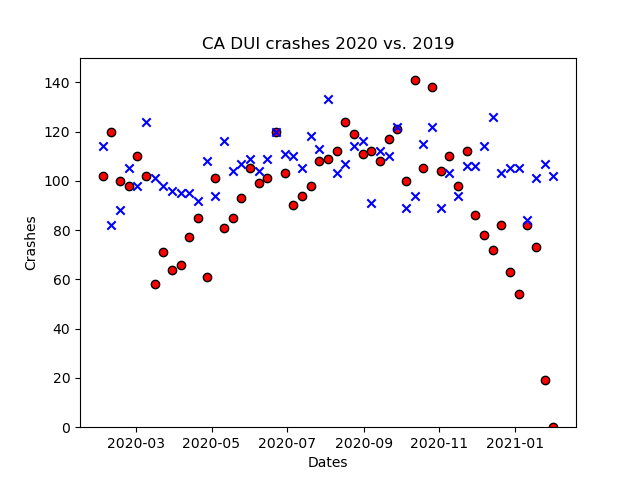

In [115]:
plt.ylim(0, 150)
plt.title("CA DUI crashes 2020 vs. 2019")
plt.xlabel("Dates")
plt.ylabel("Crashes")
plt.scatter(formatted_dates, D, marker="o", facecolors= "red", edgecolors= "black")
plt.scatter(formatted_dates, D2, marker= "x", color= "blue")